# Getting Data from Mastodon

> Mastodon is an ActivityPub-based, Twitter-like federated social network node. It provides an API that allows you to interact with every aspect of the platform.

In addition to commonly used social media platforms, Mastodon is decentralized. Anyone can host their own Mastodon server and connect it to other servers.

This Python Notebook serves as a brief introduction on how to use the Mastodon API to request posts.

Lets embark our journey !! 😉

### Author 👥
- **Martin Brucker** (942815) 🧑‍💻

**Due**: Friday, 12 April 2024, 11:59 PM 

**Contact Information**: martin.brucker@student.fh-kiel.de 📧

## API-Wrapper: Mastodon.py

Apart from basic HTTP requests to the API, there is a simple Python wrapper available that implements the complete Mastodon API. The [documentation](https://mastodonpy.readthedocs.io/en/stable/index.html) provides good examples on how to use the library. Additionally, I recommend checking out [Martin's blog post](https://martinheinz.dev/blog/86) on using Mastodon.py, which provides a great hands-on approach.

In [2]:
# installing and importing the API wrapper

# !pip install Mastodon.py
import mastodon
from mastodon import Mastodon

## Selecting a Mastodon Instance and Getting the API Token

Since Mastodon is organized in a decentralized manner, you need to choose a node to serve as your home instance. The selection of your home node has a significant impact on what will be shown on your timeline. You can find an overview of all Mastodon servers via this [link](https://joinmastodon.org/de/servers). For this notebook, we will be using [troet.cafe](https://troet.cafe) as it is the largest German server with approximately 8.5k active users. Please note that some Mastodon servers may prohibit or provide limited API access.

Instead of using your username and password for authentication, it is recommended to use an application token. This token can be easily revoked and allows you to define the permissions of the application more precisely.

To create an account on the Mastodon instance, visit https://*your-instance-url*/settings/applications. There, you can create a new application and obtain a new token.

<img src="https://i.imgur.com/KYh5JMB.png" width=500 />

The next step is to obtain the access token from the newly created application. Please ensure that you do not share your tokens, as anyone with access can perform actions on your behalf.

<img src="https://i.imgur.com/B4n6RaL.png" width=500 />

To ensure that the access token is not shared with other people, in this use case, I recommend using a .env file, for futher information check this [blog](https://dev.to/jakewitcher/using-env-files-for-environment-variables-in-python-applications-55a1) out.

In [3]:
# !pip install dotenv
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
# setting up the Mastodon API
instance_url = "https://troet.cafe" 
access_token = os.getenv('TROET_CAFE_ACCESS_TOKEN') 

# Note: if you have never worked with dotenv check this out https://pypi.org/project/python-dotenv/ 
# or just replace the os.getenv with your access token in clear text (NOT RECCOMENDED)

m = Mastodon(access_token=access_token, api_base_url=instance_url)

## Getting Data 📊

For the purpose of social media analysis, **our primary focus will be on retrieving data from the Mastodon API**. It's worth noting that the API wrapper can also handle posting data if you're curious about that aspect. If you'd like more detailed information on posting, I recommend checking out the official documentation.

Now, let's dive into the core elements:

1. **Timelines**: The heartbeat of any social media platform! Mastodon has two main timelines:
    - **User Timeline**: This displays posts from a specific user based on followed users or reposts.
    - **Local Timeline**: Here, you'll find all the postings on the current Mastodon server.

2. **Post Content**: Each post contains both unstructured content (the actual text of the post) and structured metadata (such as timestamps, likes, and user IDs). These individual IDs allow us to create fascinating graphs that reveal post-user relationships.

3. **Additional Information**: Beyond posts, the API provides access to other valuable data:
    - **Accounts**: Details about user accounts.
    - **Likes**: Information on post likes.
    - **Statuses**: Various status updates.

Feel free to explore these endpoints and uncover more insights! 🚀

In [5]:
# get the local timeline limit spesifys the number of toots to get 40 is max
timeline = m.timeline_local(limit=40)

In [6]:
# displaying what information a single post contains
timeline[0]

{'id': 112206442717134185,
 'created_at': datetime.datetime(2024, 4, 3, 8, 54, 0, 870000, tzinfo=tzutc()),
 'in_reply_to_id': None,
 'in_reply_to_account_id': None,
 'sensitive': False,
 'spoiler_text': '',
 'visibility': 'public',
 'language': 'de',
 'uri': 'https://troet.cafe/users/Lassitudor/statuses/112206442717134185',
 'url': 'https://troet.cafe/@Lassitudor/112206442717134185',
 'replies_count': 0,
 'reblogs_count': 0,
 'favourites_count': 0,
 'edited_at': None,
 'favourited': False,
 'reblogged': False,
 'muted': False,
 'bookmarked': False,
 'content': '<p>Samstag soll es 27 Grad werden. Langsam wird es Zeit, den Rest Glühwein zu vernichten.</p>',
 'filtered': [],
 'reblog': None,
 'application': {'name': 'Mastodon for Android',
  'website': 'https://app.joinmastodon.org/android'},
 'account': {'id': 109306091908099372,
  'username': 'Lassitudor',
  'acct': 'Lassitudor',
  'display_name': 'Lassitudor',
  'locked': False,
  'bot': False,
  'discoverable': True,
  'group': False,

# Demo Use Case

Since the API is publicly available, there is a **wide variety** of applications that are used to post a posting. You can display this information as follows:

In [7]:
# !pip install matplotlib 
import pandas as pd

<Axes: title={'center': 'Applications used to post to Troet.cafe'}, xlabel='Number of posts', ylabel='Application'>

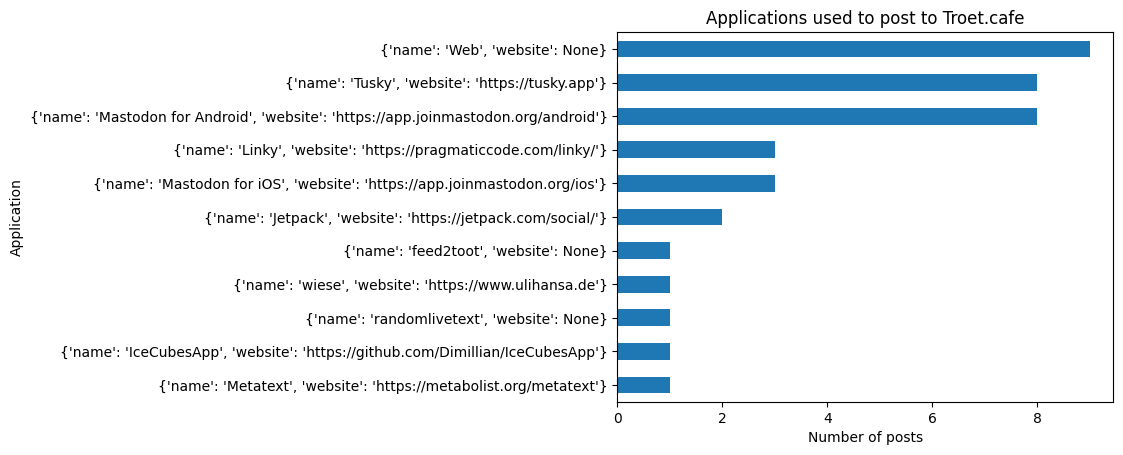

In [8]:
# transform the timeline into a pandas dataframe
timelineDF = pd.DataFrame(timeline)

timelineDF["application"].value_counts().sort_values(ascending=True).plot(
    kind="barh", 
    title="Applications used to post to Troet.cafe",
    ylabel="Application",
    xlabel="Number of posts")

## Summary 📝

**Good:**
- **Free of Use**: Mastodon is freely accessible.
- **Made by Devs for Devs**: It has a great API and demo.
- **Decentralized**: Unlike Twitter, where the API access can be closed centrally, each Mastodon owner can decide independently.
- **Python API Wrapper**: There's a convenient Python API wrapper available.

**Bad:**
- **Twitter Has Geolocation**: Twitter provides better metadata due to geolocation features.
- **Higher User Numbers on Twitter**: Twitter has a larger user base.

## Usecases Brainstorming 🧠
- **Text/Sentiment Analysis**: Mastodon data can be used for sentiment analysis.
- **Analyzing "Bubbles"**: Explore how people or postings relate to each other.
- **Training ML Models with Recommended Posts**: Utilize Mastodon posts for training machine learning models. 🤖